In [1]:
# TRAIGO TODO EL REM DATOS HISTORICOS

import pandas as pd

URL_REM = "https://www.bcra.gob.ar/archivos/Pdfs/PublicacionesEstadisticas/historico-relevamiento-expectativas-mercado.xlsx"

df = pd.read_excel(URL_REM, sheet_name="Base de Datos Completa", skiprows=1)

print(df.shape)        # filas, columnas
print(df.columns)      # nombres de columnas

(7146, 14)
Index(['Fecha de pronóstico', 'Variable', 'Referencia', 'Período', 'Mediana',
       'Promedio', 'Desvío', 'Máximo', 'Mínimo', 'Percentil 90',
       'Percentil 75', 'Percentil 25', 'Percentil 10',
       'Cantidad de participantes'],
      dtype='object')


C:\Users\CEU1\Downloads\Fran\Nueva carpeta\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
# ME QUEDO SOLO CON EL IPC MINORISTA -NIVEL GENERAL- Y LA VAR MENSUAL

df_ipc_rem = df[
    (df["Variable"] == "Precios minoristas (IPC nivel general; INDEC)") &
    (df["Referencia"] == "var. % mensual")
].copy()

print(df_ipc_rem.shape)
df_ipc_rem.tail(10)


(767, 14)


,Fecha de pronóstico,Variable,Referencia,Período,Mediana,Promedio,Desvío,Máximo,Mínimo,Percentil 90,Percentil 75,Percentil 25,Percentil 10,Cantidad de participantes
7004,2025-10-31,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-02-28 00:00:00,1.70000,1.679576,0.347982,3.190000,0.900000,1.990000,1.800000,1.512500,1.306857,42
7005,2025-10-31,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-03-31 00:00:00,1.77000,1.787612,0.402136,3.150000,0.800000,2.199340,1.946546,1.594341,1.410000,42
7006,2025-10-31,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-04-30 00:00:00,1.55000,1.565230,0.352405,2.750000,0.700000,2.000000,1.676846,1.402500,1.207070,42
7073,2025-11-28,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2025-11-30 00:00:00,2.30000,2.272323,0.207555,2.600000,1.852484,2.500000,2.400000,2.100000,1.946780,46
7074,2025-11-28,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2025-12-31 00:00:00,2.07104,2.094682,0.224030,2.600000,1.700000,2.393832,2.300000,1.980426,1.800000,46
7075,2025-11-28,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-01-31 00:00:00,1.90000,1.906814,0.285764,2.700000,1.100000,2.276980,2.029618,1.795267,1.600000,46
7076,2025-11-28,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-02-28 00:00:00,1.70000,1.721974,0.264135,2.633518,1.000000,2.000000,1.848356,1.510000,1.455000,46
7077,2025-11-28,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-03-31 00:00:00,1.80000,1.852447,0.327988,2.900000,1.100000,2.235000,2.000000,1.700000,1.480000,46
7078,2025-11-28,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-04-30 00:00:00,1.60000,1.617832,0.269916,2.400000,0.850000,1.940000,1.797500,1.440000,1.324911,46
7079,2025-11-28,Precios minoristas (IPC nivel general; INDEC),var. % mensual,2026-05-31 00:00:00,1.50000,1.496227,0.279385,2.400000,0.800000,1.767798,1.600000,1.400000,1.137606,46


In [3]:
# ME QUEDO SOLO CON LOS ÚLTIMOS 7 DATOS (ÚLTIMA PUBLICACIÓN) Y SOLO CON LA MEDIANA

ultima_fecha = df_ipc_rem["Fecha de pronóstico"].max()

df_ult = df_ipc_rem[df_ipc_rem["Fecha de pronóstico"] == ultima_fecha].copy()

df_ult = df_ult.sort_values("Período").tail(7)

df_rem = df_ult[["Período", "Mediana"]].reset_index(drop=True)

df_rem = df_rem.rename(columns={"Período": "Fecha"}).reset_index(drop=True)

df_rem




,Fecha,Mediana
0,2025-11-30 00:00:00,2.30000
1,2025-12-31 00:00:00,2.07104
2,2026-01-31 00:00:00,1.90000
3,2026-02-28 00:00:00,1.70000
4,2026-03-31 00:00:00,1.80000
5,2026-04-30 00:00:00,1.60000
6,2026-05-31 00:00:00,1.50000


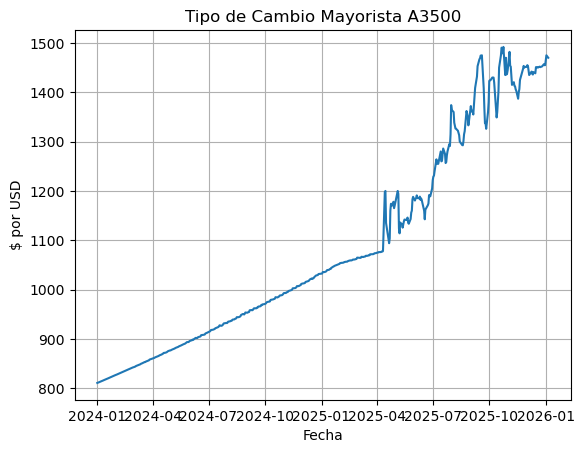

,Fecha,A3500
487,2024-01-02,810.7
486,2024-01-03,811.1
485,2024-01-04,811.7
484,2024-01-05,812.2
483,2024-01-08,813.8
...,...,...
4,2025-12-29,1457.0
3,2025-12-30,1455.0
2,2025-12-31,1455.0
1,2026-01-02,1475.0


In [4]:
# TRAEMOS A3500

import pandas as pd
import requests, urllib3
import matplotlib.pyplot as plt

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# --- Descargar A3500 ---
hoy = pd.Timestamp.today().strftime("%Y-%m-%d")

url = "https://api.bcra.gob.ar/estadisticascambiarias/v1.0/Cotizaciones/USD"
params = {
    "fechaDesde": "2024-01-01",
    "fechaHasta": hoy,
    "limit": 1000,
    "offset": 0
}

r = requests.get(url, params=params, verify=False, timeout=30)
r.raise_for_status()
payload = r.json()

rows = [{
    "Fecha": it["fecha"],
    "A3500": it["detalle"][0]["tipoCotizacion"]
} for it in payload["results"]]

df_tc = pd.DataFrame(rows)
df_tc["Fecha"] = pd.to_datetime(df_tc["Fecha"])
df_tc = df_tc.sort_values("Fecha")

# --- Gráfico ---
plt.figure()
plt.plot(df_tc["Fecha"], df_tc["A3500"])
plt.title("Tipo de Cambio Mayorista A3500")
plt.xlabel("Fecha")
plt.ylabel("$ por USD")
plt.grid(True)
plt.show()

df_tc

In [5]:
# BANDAS 2025

import numpy as np

# --- parámetros bandas 2025 ---
inicio = pd.Timestamp("2025-04-14")
fin    = pd.Timestamp("2025-12-31")

piso0  = 1000.0
techo0 = 1400.0
g_up   = (1 + 0.01) ** (1/30)   # +1% mensual -> factor diario
g_dn   = (1 - 0.01) ** (1/30)   # -1% mensual -> factor diario

# --- 1) bandas en calendario diario (incluye fines de semana) ---
cal = pd.DataFrame({"Fecha": pd.date_range(inicio, fin, freq="D")})
t = np.arange(len(cal))  # 0,1,2,...
cal["piso"]  = piso0  * (g_dn ** t)
cal["techo"] = techo0 * (g_up ** t)

# --- 2) quedarme SOLO con días hábiles del TC ---
# df_tc: columnas ["Fecha","A3500"] diario hábil
tc_habil = (
    df_tc[(df_tc["Fecha"] >= inicio) & (df_tc["Fecha"] <= fin)]
    .sort_values("Fecha")[["Fecha","A3500"]]
    .rename(columns={"A3500": "TC"})
)

# --- 3) merge: piso/techo de esas fechas (ya acumulan fin de semana) ---
df = tc_habil.merge(cal, on="Fecha", how="left")

df.tail(100)


,Fecha,TC,piso,techo
73,2025-08-04,1360.0,963.173946,1452.985112
74,2025-08-05,1338.5,962.851326,1453.467115
75,2025-08-06,1332.0,962.528814,1453.949278
76,2025-08-07,1326.5,962.206410,1454.431600
77,2025-08-08,1326.0,961.884115,1454.914083
...,...,...,...,...
168,2025-12-23,1451.0,918.734745,1522.550202
169,2025-12-26,1452.5,917.811850,1524.065944
170,2025-12-29,1457.0,916.889882,1525.583195
171,2025-12-30,1455.0,916.582765,1526.089280


In [6]:
# TRAIGO IPC MENSUAL -NIVEL GENERAL-

import pandas as pd

csv_url = "https://infra.datos.gob.ar/catalog/sspm/dataset/145/distribution/145.3/download/indice-precios-al-consumidor-nivel-general-base-diciembre-2016-mensual.csv"

ipc = pd.read_csv(csv_url)

ipc = ipc[["indice_tiempo", "ipc_ng_nacional_tasa_variacion_mensual"]].copy()
ipc = ipc.rename(columns={
    "indice_tiempo": "Fecha",
    "ipc_ng_nacional_tasa_variacion_mensual": "v_m_IPC"
})

ipc["Fecha"] = pd.to_datetime(ipc["Fecha"], errors="coerce")
ipc = ipc.dropna(subset=["Fecha"]).sort_values("Fecha")

ipc.tail(12)



,Fecha,v_m_IPC
96,2024-12-01,0.027041
97,2025-01-01,0.022110
98,2025-02-01,0.024016
99,2025-03-01,0.037293
100,2025-04-01,0.027808
101,2025-05-01,0.015011
102,2025-06-01,0.016189
103,2025-07-01,0.019017
104,2025-08-01,0.018758
105,2025-09-01,0.020760


In [7]:
# BANDAS 2026. JUNTO REM E IPC y ACTUALIZACIÓN

import pandas as pd

# -----------------------------
# 0) Asegurar nombres estándar
# -----------------------------
ipc = ipc.copy()  # debe tener: Fecha, v_m_IPC
rem = df_rem.copy()  # debe tener: Fecha (o Periodo), Mediana

# si REM viene como "Periodo", lo pasamos a "Fecha"
if "Fecha" not in rem.columns and "Periodo" in rem.columns:
    rem = rem.rename(columns={"Periodo": "Fecha"})

# -----------------------------
# 1) Parsear fechas
# -----------------------------
ipc["Fecha"] = pd.to_datetime(ipc["Fecha"], errors="coerce")
rem["Fecha"] = pd.to_datetime(rem["Fecha"], errors="coerce")

ipc = ipc.dropna(subset=["Fecha"])
rem = rem.dropna(subset=["Fecha"])

# -----------------------------
# 2) Crear Periodo (mes-año) y dejar 1 obs por mes
# -----------------------------
ipc["Periodo"] = ipc["Fecha"].dt.to_period("M")
rem["Periodo"] = rem["Fecha"].dt.to_period("M")

# quedarnos con columnas necesarias
ipc_m = ipc[["Periodo", "v_m_IPC"]].drop_duplicates(subset=["Periodo"])
rem_m = rem[["Periodo", "Mediana"]].drop_duplicates(subset=["Periodo"]).rename(columns={"Mediana": "v_m_REM"})

# -----------------------------
# 3) Merge mensual
# -----------------------------
df_merge = ipc_m.merge(rem_m, on="Periodo", how="outer").sort_values("Periodo").reset_index(drop=True)

df_merge.tail(24)


# DF PARA BANDAS

import pandas as pd
import numpy as np

# df_merge debe tener: Periodo (Period[M]), v_m_IPC, v_m_REM
m = df_merge.copy()

# 1) inflación "base" por mes: IPC si existe, si no REM
m["v_m_base"] = np.where(m["v_m_IPC"].notna(), m["v_m_IPC"], m["v_m_REM"])

# 2) detectar último mes con IPC disponible
last_ipc = m.loc[m["v_m_IPC"].notna(), "Periodo"].max()

# 3) armar rango de meses 2026 hasta (último REM + 2)
last_rem = m.loc[m["v_m_REM"].notna(), "Periodo"].max()
end_month = last_rem + 2  # ej: 2026-05 + 2 = 2026-07

# meses objetivo: 2026-01 a end_month
target = pd.period_range("2026-01", end_month, freq="M")

bandas_2026 = pd.DataFrame({"Periodo": target})

# 4) para cada mes t, usar mes_ref = t - 2
bandas_2026["mes_ref"] = bandas_2026["Periodo"] - 2

# 5) traer inflación base del mes_ref
bandas_2026 = bandas_2026.merge(
    m[["Periodo", "v_m_IPC", "v_m_REM", "v_m_base"]].rename(columns={"Periodo": "mes_ref"}),
    on="mes_ref",
    how="left"
)

# 6) opcional: marcar fuente (IPC vs REM)
bandas_2026["fuente"] = np.where(bandas_2026["v_m_IPC"].notna(), "IPC", "REM")

# 7) quedarnos con lo útil
bandas_2026 = bandas_2026[["Periodo", "mes_ref", "v_m_base", "fuente"]]

bandas_2026

bandas_2026 = bandas_2026.copy()

bandas_2026["v_m_dec"] = np.where(
    bandas_2026["fuente"].str.upper() == "REM",
    bandas_2026["v_m_base"] / 100.0,
    bandas_2026["v_m_base"]
)

bandas_2026

,Periodo,mes_ref,v_m_base,fuente,v_m_dec
0,2026-01,2025-11,0.024729,IPC,0.024729
1,2026-02,2025-12,2.071040,REM,0.020710
2,2026-03,2026-01,1.900000,REM,0.019000
3,2026-04,2026-02,1.700000,REM,0.017000
4,2026-05,2026-03,1.800000,REM,0.018000
5,2026-06,2026-04,1.600000,REM,0.016000
6,2026-07,2026-05,1.500000,REM,0.015000


In [8]:
import pandas as pd
import numpy as np

# ============================================================
# BANDAS 2026 (diarias)
# Requiere:
#   1) df: DataFrame con columnas ["Fecha","piso","techo"] (incluye 2025-12-31)
#   2) bandas_2026: DataFrame mensual con columnas:
#        ["Periodo" (Period M), "v_m_base", "fuente"]
#      donde:
#        - fuente == "IPC"  => v_m_base ya viene en DECIMAL (0.024729 = 2.4729%)
#        - fuente == "REM"  => v_m_base viene en % (2.07104 = 2.07104%), hay que /100
# ============================================================

# -----------------------
# 0) Base (último dato de df, típicamente 2025-12-31)
# -----------------------
df = df.copy()
df["Fecha"] = pd.to_datetime(df["Fecha"])
last = df.sort_values("Fecha").tail(1).iloc[0]

piso0  = float(last["piso"])
techo0 = float(last["techo"])

# -----------------------
# 1) Normalizar inflación mensual a decimal homogéneo
# -----------------------
bandas_2026 = bandas_2026.copy()

# Asegurar Periodo como Period[M]
if not isinstance(bandas_2026["Periodo"].dtype, pd.PeriodDtype):
    bandas_2026["Periodo"] = pd.PeriodIndex(bandas_2026["Periodo"], freq="M")

bandas_2026["v_m_dec"] = np.where(
    bandas_2026["fuente"].str.upper().eq("REM"),
    bandas_2026["v_m_base"] / 100.0,   # REM viene en %
    bandas_2026["v_m_base"]            # IPC viene en decimal
)

# -----------------------
# 2) Calendario diario 2026 hasta fin del último período disponible
# -----------------------
inicio = pd.Timestamp("2026-01-01")
fin = bandas_2026["Periodo"].max().to_timestamp("M")  # fin de mes del último período

cal = pd.DataFrame({"Fecha": pd.date_range(inicio, fin, freq="D")})
cal["Periodo"] = cal["Fecha"].dt.to_period("M")

# -----------------------
# 3) Asignar a cada día su inflación mensual (decimal) y pasar a diaria
#     Regla: (1 + v_m_dec)^(1/30) - 1  (tal como definiste)
# -----------------------
cal = cal.merge(bandas_2026[["Periodo", "v_m_dec"]], on="Periodo", how="left")
cal["r_d"] = (1 + cal["v_m_dec"]) ** (1/30) - 1

# -----------------------
# 4) Construir bandas diarias
#     SIN shift: 2026-01-01 ya aplica el 1er día de ajuste
# -----------------------
cal["piso_2026"]  = piso0  * (1 - cal["r_d"]).cumprod()
cal["techo_2026"] = techo0 * (1 + cal["r_d"]).cumprod()

# -----------------------
# 5) Output final
# -----------------------
bandas_diarias_2026 = cal[["Fecha", "Periodo", "v_m_dec", "piso_2026", "techo_2026"]].copy()

bandas_diarias_2026.head(10), bandas_diarias_2026.tail(10)


(       Fecha  Periodo   v_m_dec   piso_2026   techo_2026
 0 2026-01-01  2026-01  0.024729  915.529342  1527.839116
 1 2026-01-02  2026-01  0.024729  914.783542  1529.083710
 2 2026-01-03  2026-01  0.024729  914.038349  1530.329318
 3 2026-01-04  2026-01  0.024729  913.293764  1531.575941
 4 2026-01-05  2026-01  0.024729  912.549785  1532.823580
 5 2026-01-06  2026-01  0.024729  911.806412  1534.072235
 6 2026-01-07  2026-01  0.024729  911.063644  1535.321907
 7 2026-01-08  2026-01  0.024729  910.321482  1536.572597
 8 2026-01-09  2026-01  0.024729  909.579924  1537.824305
 9 2026-01-10  2026-01  0.024729  908.838970  1539.077034,
          Fecha  Periodo  v_m_dec   piso_2026   techo_2026
 202 2026-07-22  2026-07    0.015  807.812350  1731.429810
 203 2026-07-23  2026-07    0.015  807.411343  1732.289310
 204 2026-07-24  2026-07    0.015  807.010536  1733.149236
 205 2026-07-25  2026-07    0.015  806.609928  1734.009589
 206 2026-07-26  2026-07    0.015  806.209518  1734.870369
 207 20

In [9]:
import pandas as pd

# ============================================================
# MERGE 2025 (df) + 2026 (bandas_diarias_2026) en 1 solo DF diario
# Output: ["Fecha","piso","techo"] desde 2025-04-14 hasta 2026-07-31
# ============================================================

# --- Asegurar tipos ---
df_2025 = df.copy()
df_2025["Fecha"] = pd.to_datetime(df_2025["Fecha"])
df_2025 = df_2025.sort_values("Fecha")[["Fecha", "piso", "techo"]]

df_2026 = bandas_diarias_2026.copy()
df_2026["Fecha"] = pd.to_datetime(df_2026["Fecha"])
df_2026 = df_2026.sort_values("Fecha")[["Fecha", "piso_2026", "techo_2026"]].rename(
    columns={"piso_2026": "piso", "techo_2026": "techo"}
)

# --- Cortes pedidos ---
inicio = pd.Timestamp("2025-04-14")
fin = pd.Timestamp("2026-07-31")  # o df_2026["Fecha"].max()

df_2025 = df_2025[(df_2025["Fecha"] >= inicio) & (df_2025["Fecha"] <= pd.Timestamp("2025-12-31"))]
df_2026 = df_2026[(df_2026["Fecha"] >= pd.Timestamp("2026-01-01")) & (df_2026["Fecha"] <= fin)]

# --- Unir ---
bandas_total = pd.concat([df_2025, df_2026], ignore_index=True).sort_values("Fecha").reset_index(drop=True)

bandas_total.head(5), bandas_total.tail(5), bandas_total.shape


(       Fecha         piso        techo
 0 2025-04-14  1000.000000  1400.000000
 1 2025-04-15   999.665045  1400.464426
 2 2025-04-16   999.330202  1400.929006
 3 2025-04-21   997.657669  1403.254218
 4 2025-04-22   997.323499  1403.719723,
          Fecha        piso        techo
 380 2026-07-27  805.809308  1735.731577
 381 2026-07-28  805.409296  1736.593212
 382 2026-07-29  805.009482  1737.455274
 383 2026-07-30  804.609867  1738.317765
 384 2026-07-31  804.210451  1739.180684,
 (385, 3))

In [15]:
import pandas as pd

# ============================================================
# MERGE FINAL: bandas_total (diario) + df_tc (hábiles)
# Output diario hasta 2026-07-31 con columnas: Fecha, piso, techo, TC
# (TC queda NaN en días sin dato / después del último disponible)
# ============================================================

# --- Copias + tipos ---
bandas = bandas_total.copy()
bandas["Fecha"] = pd.to_datetime(bandas["Fecha"])
bandas = bandas.sort_values("Fecha")[["Fecha", "piso", "techo"]]

tc = df_tc.copy()
tc["Fecha"] = pd.to_datetime(tc["Fecha"])
tc = tc.sort_values("Fecha")[["Fecha", "A3500"]].rename(columns={"A3500": "TC"})

# --- Merge (bandas manda el calendario) ---
df_final = bandas.merge(tc, on="Fecha", how="left")

df_final.head(5), df_final.tail(5), df_final.shape
fechas = [
    "2026-01-01","2026-02-01","2026-02-02","2026-03-01","2026-03-02",
    "2026-04-01","2026-04-02","2026-05-01","2026-05-02","2026-06-01","2026-06-02"
]

df_final[df_final["Fecha"].isin(pd.to_datetime(fechas))]



,Fecha,piso,techo,TC
173,2026-01-01,915.529342,1527.839116,NaN
204,2026-02-01,892.806940,1566.691497,NaN
205,2026-02-02,892.196681,1567.762375,NaN
232,2026-03-01,875.925460,1596.865154,NaN
233,2026-03-02,875.375739,1597.867329,NaN
263,2026-04-01,859.099894,1628.120182,NaN
264,2026-04-02,858.617027,1629.035287,NaN
293,2026-05-01,844.703614,1655.852470,NaN
294,2026-05-02,844.201150,1656.837439,NaN
324,2026-06-01,829.319835,1686.549952,NaN


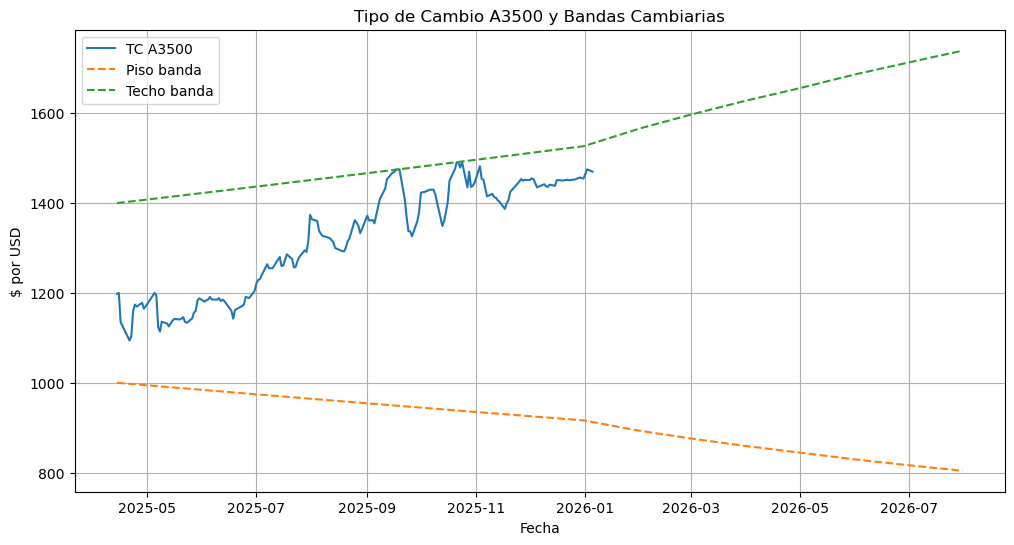

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) TC solo donde hay dato (evita NaN)
tc_plot = df_final.dropna(subset=["TC"]).copy()
tc_plot = tc_plot.sort_values("Fecha")

# 2) último dato observado de TC
ult = tc_plot.iloc[-1]   # tiene Fecha y TC

plt.figure(figsize=(12,6))

# --- TC (solo observado) ---
plt.plot(tc_plot["Fecha"], tc_plot["TC"], label="TC A3500")

# --- Bandas (calendario completo) ---
plt.plot(df_final["Fecha"], df_final["piso"], label="Piso banda", linestyle="--")
plt.plot(df_final["Fecha"], df_final["techo"], label="Techo banda", linestyle="--")



plt.title("Tipo de Cambio A3500 y Bandas Cambiarias")
plt.xlabel("Fecha")
plt.ylabel("$ por USD")
plt.legend()
plt.grid(True)
plt.show()
